In [34]:
# %pip install matplotlib --quiet

In [35]:
import matplotlib.pyplot as plt
import random
import math
import os
import shutil
from IPython.display import display, clear_output

In [36]:
%matplotlib inline

In [37]:
shutil.rmtree('criacao_base', ignore_errors=True)
os.makedirs('criacao_base', exist_ok=True)

In [38]:
tamanho = (500, 500)
ponto_inicial_final = (0, 0), tamanho
raio_size = 25
visual_s = 5
qtd_centroides = 25
paciencia = 10

In [39]:
def inserir_circulo(ax, x, y, raio_size, visual_s, color_centro, color_ext):
    valores_adicionados = []
    valores_adicionados.append(ax.scatter(x, y, color=color_centro, s=visual_s))
    
    valor_baixo = (x, y - raio_size)
    valor_cima = (x, y + raio_size)
    valor_esquerda = (x - raio_size, y)
    valor_direita = (x + raio_size, y)
    posicoes = (valor_baixo, valor_cima, valor_esquerda, valor_direita)
    [valores_adicionados.append(ax.scatter(*posicao, color=color_ext, s=visual_s)) for posicao in posicoes]

    valores_adicionados.append(plt.Circle((x, y), raio_size, color=color_ext, fill=False))
    ax.add_patch(valores_adicionados[-1])

    posicao_circulo = (valor_baixo, valor_cima, valor_esquerda, valor_direita)
    return valores_adicionados, posicao_circulo

def salvar_e_exibir(figura, nome_arquivo):
    figura.savefig(nome_arquivo, bbox_inches='tight', pad_inches=0.1, dpi=150)
    clear_output(wait=True)
    display(figura)

def remover_valores_pintados(valores_pintados):
    for valor_adicionado in valores_pintados:
        valor_adicionado.remove()

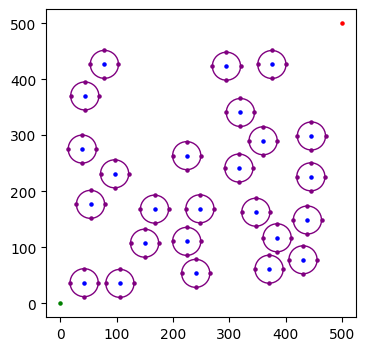

In [40]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(*ponto_inicial_final[0], color='green', s=visual_s)
ax.scatter(*ponto_inicial_final[1], color='red', s=visual_s);
plt.savefig('criacao_base/0_pontos_iniciais.png', bbox_inches='tight', pad_inches=0.1, dpi=150)

centroids = []
posicoes_centroides = []

interacao_atual = 0
paciencia_atual = 0

def verificar_distancia(x1, y1, x2, y2, raio_size) -> bool:
    distancia_x = x2 - x1
    distancia_y = y2 - y1
    distancia_euclidiana = math.sqrt(distancia_x ** 2 + distancia_y ** 2)
    return distancia_euclidiana < 2 * raio_size

while len(centroids) < qtd_centroides and paciencia_atual < paciencia:

    interacao_atual += 1
    paciencia_atual += 1
    
    x = random.uniform(raio_size, tamanho[0] - raio_size)
    y = random.uniform(raio_size, tamanho[1] - raio_size)

    if verificar_distancia(x, y, *ponto_inicial_final[0], raio_size):
        print(f'Ponto ({x}, {y}) está dentro da área de influência do ponto inicial.')
        continue
    
    elif verificar_distancia(x, y, *ponto_inicial_final[1], raio_size):
        print(f'Ponto ({x}, {y}) está dentro da área de influência do ponto final.')
        continue

    elif any(verificar_distancia(centroid[0], centroid[1], x, y, raio_size) for centroid in centroids):
        print(f'Ponto ({x}, {y}) está dentro da área de influência de um dos centroides já criados.')
        valores_pintados, _ = inserir_circulo(ax, x, y, raio_size, visual_s, 'red', 'orange')
        salvar_e_exibir(fig, f'criacao_base/{interacao_atual}_centroid_falha.png')
        remover_valores_pintados(valores_pintados)
        continue
    
    else:
        _, posicao_circulo = inserir_circulo(ax, x, y, raio_size, visual_s, 'blue', 'purple')
        salvar_e_exibir(fig, f'criacao_base/{interacao_atual}_centroid.png')
        centroids.append((x, y))
        posicoes_centroides.append(posicao_circulo)
        paciencia_atual = 0
    

plt.close(fig)

In [41]:
centroids

[(96.58983192592048, 231.16969832824392),
 (224.47142817382436, 110.56860736903909),
 (105.95994834947216, 35.530413476465206),
 (247.89968941411556, 168.71457849549705),
 (78.42757794113749, 426.6382040430916),
 (149.8153836069851, 107.30486624964104),
 (224.5067854676117, 263.63493863518704),
 (317.07805865008606, 241.45640103500529),
 (53.83119158838629, 176.6555735355038),
 (42.5197721246806, 36.763035475906584),
 (319.7397165257713, 340.68061954929925),
 (347.140107991452, 162.62629775390263),
 (445.7468981890488, 298.7519436080146),
 (384.917599631686, 116.94944640985909),
 (444.71762260460974, 225.79443482158797),
 (375.5931387325983, 426.3962729119939),
 (438.63254802970556, 148.6792632782441),
 (370.6228716489431, 60.819575901038505),
 (430.8224743567869, 77.63776959071721),
 (295.01170856562305, 423.35588210431746),
 (39.21594662359666, 275.3534645060442),
 (360.0942980316343, 290.21209959950426),
 (43.65266133965433, 370.2238528674981),
 (240.5087141356516, 53.41350247228971

In [42]:
posicoes_centroides

[((96.58983192592048, 206.16969832824392),
  (96.58983192592048, 256.16969832824395),
  (71.58983192592048, 231.16969832824392),
  (121.58983192592048, 231.16969832824392)),
 ((224.47142817382436, 85.56860736903909),
  (224.47142817382436, 135.56860736903909),
  (199.47142817382436, 110.56860736903909),
  (249.47142817382436, 110.56860736903909)),
 ((105.95994834947216, 10.530413476465206),
  (105.95994834947216, 60.530413476465206),
  (80.95994834947216, 35.530413476465206),
  (130.95994834947214, 35.530413476465206)),
 ((247.89968941411556, 143.71457849549705),
  (247.89968941411556, 193.71457849549705),
  (222.89968941411556, 168.71457849549705),
  (272.8996894141155, 168.71457849549705)),
 ((78.42757794113749, 401.6382040430916),
  (78.42757794113749, 451.6382040430916),
  (53.427577941137486, 426.6382040430916),
  (103.42757794113749, 426.6382040430916)),
 ((149.8153836069851, 82.30486624964104),
  (149.8153836069851, 132.30486624964104),
  (124.81538360698511, 107.30486624964104)